In [1]:
import pandas as pd
import numpy as np
#reading the given pengins.csv file
df_b2=pd.DataFrame(pd.read_csv("covid_buffalo_preprocessed.csv"))
df_b2



,Test Date,New Positives,Cumulative Number of Positives,Total Number of Tests Performed,Cumulative Number of Tests Performed,Test % Positive,County_numeric,Geography_numeric,County_Albany,County_Allegany,...,County_Wyoming,County_Yates,Geography_County,Geography_Region,Geography_Statewide,New Positives_normalised,Cumulative Number of Positives_normalised,Total Number of Tests Performed_normalised,Cumulative Number of Tests Performed_normalised,Test % Positive_normalised
0,2023-08-30,17.0,80708.00,103.0,1473117.00,0.1099,0,0,1,0,...,0,0,1,0,0,0.078363,0.509977,0.022117,0.393756,0.608864
1,2023-08-30,0.0,11055.00,1.0,258396.00,0.0000,1,0,0,1,...,0,0,1,0,0,0.000000,0.069854,0.000215,0.069068,0.000000
2,2023-08-30,142.0,145552.44,1099.0,3081555.99,0.1246,2,0,0,0,...,0,0,1,0,0,0.654559,0.919716,0.235989,0.823684,0.690305
3,2023-08-30,33.0,60508.00,87.0,1248106.00,0.0600,3,0,0,0,...,0,0,1,0,0,0.152116,0.382338,0.018682,0.333612,0.332410
4,2023-08-30,63.0,145552.44,356.0,3081555.99,0.1647,4,1,0,0,...,0,0,0,1,0,0.290403,0.919716,0.076444,0.823684,0.912465
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93289,2020-03-01,0.0,0.00,0.0,0.00,0.0000,68,0,0,0,...,0,0,1,0,0,0.000000,0.000000,0.000000,0.000000,0.000000
93290,2020-03-01,0.0,0.00,0.0,0.00,0.0000,69,0,0,0,...,0,0,1,0,0,0.000000,0.000000,0.000000,0.000000,0.000000
93291,2020-03-01,0.0,0.00,0.0,0.00,0.0000,70,1,0,0,...,0,0,0,1,0,0.000000,0.000000,0.000000,0.000000,0.000000
93292,2020-03-01,0.0,0.00,0.0,0.00,0.0000,71,0,0,0,...,1,0,1,0,0,0.000000,0.000000,0.000000,0.000000,0.000000


In [4]:

Y = df_b2['Geography_numeric'].values
X = df_b2[['New Positives_normalised','Cumulative Number of Positives_normalised','Total Number of Tests Performed_normalised','Cumulative Number of Tests Performed_normalised','Test % Positive_normalised']].values
#print(X)
#print(Y)
#4th point
indices = np.arange(len(df_b2))
np.random.shuffle(indices)
train_size = int(0.8 * len(df_b2))
train_indices = indices[:train_size]
test_indices = indices[train_size:]
X_train = X[train_indices]
Y_train = Y[train_indices]
X_test = X[test_indices]
Y_test = Y[test_indices]
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)


(74635, 5)
(74635,)
(18659, 5)
(18659,)


In [5]:
import numpy as np

class LogicRegression:
    def __init__(self, learning_rate=0.01, iterations=1000, initial_w=None):
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.weights = initial_w
        self.bias = None

    def sigmoid(self, z):
        sig=1 / (1 + np.exp(-z))
        return sig

    def cost(self, h, y):
        m = y.shape[0]
        cst=(-1/m) * np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))
        return cst

    def gradient_descent(self, X, y, h):
        m = X.shape[0]
        dw = (1/m) * np.dot(X.T, (h - y))
        db = (1/m) * np.sum(h - y)
        self.weights -= self.learning_rate * dw
        self.bias -= self.learning_rate * db

    def fit(self, X, y):
        # Initialize weights with the provided initial weights or use random initialization
        if self.weights is None:
            self.weights = np.random.uniform(0, 1, (X.shape[1], 1))
        else:
            self.weights = np.array(self.weights).reshape(-1, 1)

        self.bias = 0
        loss_history = []
        
        for i in range(self.iterations):
            z = np.dot(X, self.weights) + self.bias
            h = self.sigmoid(z)
            loss = self.cost(h, y)
            loss_history.append(loss)
            self.gradient_descent(X, y, h)
            if i % 2000 == 0:
                print(f'the Loss at iteration {i} is {loss}')
        return loss_history

    def predict(self, X):
        z = np.dot(X, self.weights) + self.bias
        h = self.sigmoid(z)
        return np.where(h >= 0.5, 1, 0)

# Assuming Y_train and Y_test are reshaped to (-1, 1)
Y_train = Y_train.reshape(-1, 1)
Y_test = Y_test.reshape(-1, 1)

best_accuracy = 0
best_model = None
best_parameters = {'learning_rate': 0, 'iterations': 0, 'initial_w': None}
losses = [] 
parameters = []
# List of hyperparameters: [learning_rate, iterations, initial_weights]
hyperparameters = [
    [0.001, 10001, np.random.uniform(0, 1, X_train.shape[1])],
    [0.05, 20001, np.random.uniform(0, 1, X_train.shape[1])],
    [0.003, 15001, np.random.uniform(0, 1, X_train.shape[1])],
    [0.004, 20001, np.random.uniform(0, 1, X_train.shape[1])]
]

for i in hyperparameters:
    print(f'Training our model with learning rate: {i[0]}, iterations_count of : {i[1]}, and random initial weights')
    model = LogicRegression(learning_rate=i[0], iterations=i[1], initial_w=i[2])
    loss_all = model.fit(X_train, Y_train)
    Y_predicted = model.predict(X_test)
    accuracy = np.mean(Y_predicted == Y_test)
    print(f'Accuracy: {accuracy * 100:.2f}%')
    losses.append(loss_all)
    parameters.append(f'Learning Rate: {i[0]}, Iterations: {i[1]}')
    
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = model
        best_parameters['learning_rate'] = i[0]
        best_parameters['iterations'] = i[1]
        best_parameters['initial_w'] = i[2]

print(f'For our model, the Best accuracy obtained is  {best_accuracy * 100:.2f}% with parameters: {best_parameters}')


Training our model with learning rate: 0.001, iterations_count of : 10001, and random initial weights
the Loss at iteration 0 is 0.9109033393555919
the Loss at iteration 2000 is 0.5457934634260749
the Loss at iteration 4000 is 0.43515212026508476
the Loss at iteration 6000 is 0.39586793918780183
the Loss at iteration 8000 is 0.37653190074088994
the Loss at iteration 10000 is 0.3639973738586975
Accuracy: 85.10%
Training our model with learning rate: 0.05, iterations_count of : 20001, and random initial weights
the Loss at iteration 0 is 0.9234342459440419
the Loss at iteration 2000 is 0.29201412695832313
the Loss at iteration 4000 is 0.29012893578502325
the Loss at iteration 6000 is 0.28990191602990806
the Loss at iteration 8000 is 0.2898200891908232
the Loss at iteration 10000 is 0.28977163166197434
the Loss at iteration 12000 is 0.28973728305032515
the Loss at iteration 14000 is 0.289711077067125
the Loss at iteration 16000 is 0.28969040363099197
the Loss at iteration 18000 is 0.28967

In [6]:
print(best_parameters)

{'learning_rate': 0.001, 'iterations': 10001, 'initial_w': array([0.51843988, 0.85084829, 0.12678509, 0.93462498, 0.42412903])}


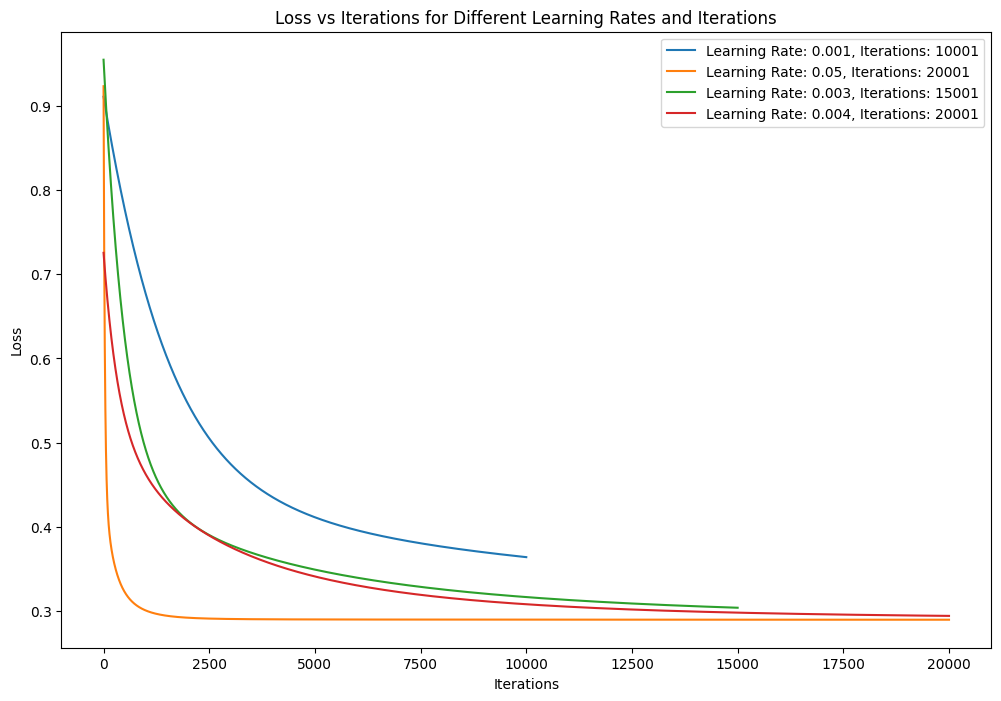

In [7]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))

for i, loss_h in enumerate(losses):
    plt.plot(loss_h, label=parameters[i])

plt.title('Loss vs Iterations for Different Learning Rates and Iterations')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.legend()
plt.show()

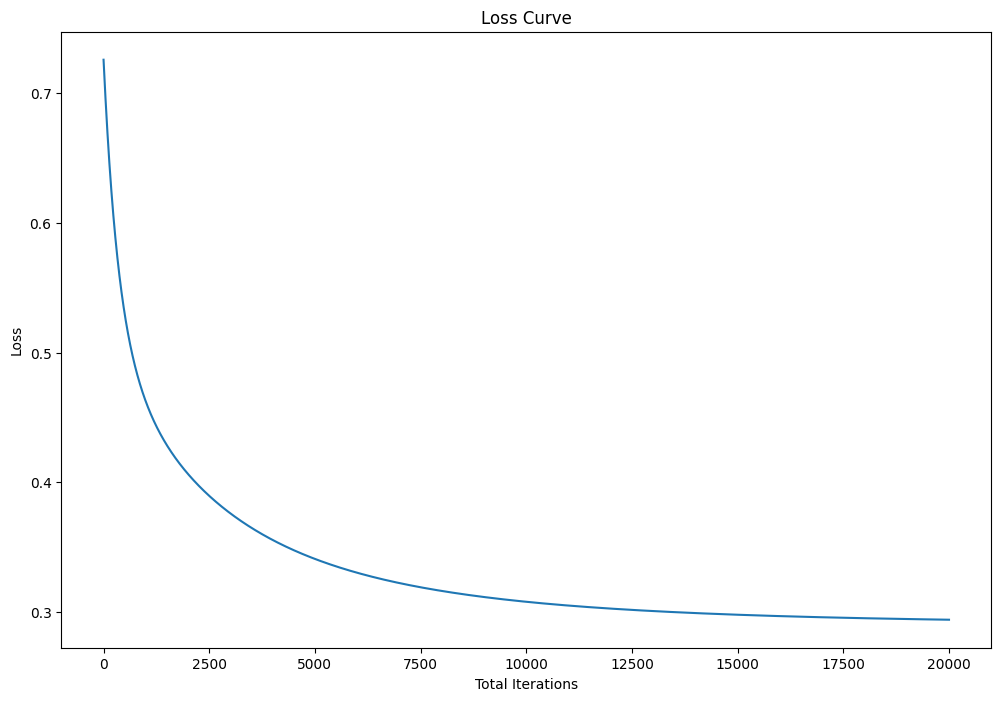

In [8]:
plt.figure(figsize=(12, 8))
plt.plot(loss_all)
plt.xlabel('Total Iterations')
plt.ylabel('Loss')
plt.title('Loss Curve')
plt.show()

In [9]:
import pickle
with open('best_logistic_regression_model_covid_buffalo.pkl', 'wb') as file:
    pickle.dump({
        'learning_rate': best_parameters['learning_rate'],
        'iterations': best_parameters['iterations'],
        'initial_w':best_parameters['initial_w']
    }, file)

print("Best model saved as 'best_logistic_regression_model_covid_buffalo.pkl'")


Best model saved as 'best_logistic_regression_model_covid_buffalo.pkl'


In [10]:
import pickle
with open('best_logistic_regression_model_covid_buffalo.pkl', 'rb') as file:
        model_data = pickle.load(file)
print("Best Model details:")
print("Learning Rate:", model_data['learning_rate'])
print("Iterations:", model_data['iterations'])
print("Initial Weights :", model_data['initial_w']) 



Best Model details:
Learning Rate: 0.001
Iterations: 10001
Initial Weights : [0.51843988 0.85084829 0.12678509 0.93462498 0.42412903]
